<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Arie !

Perkenalkan saya disini sebagai Code Reviewers, disini dengan senang hati saya akan mereview tugas Arie ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

<div class="alert alert-warning">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Arie dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

# Menilai Proyek Kinerja Outlet Penjualan

### Deskripsi Proyek :

Dataset ini berisi data pembelian yang dilakukan di peritel bahan bangunan Home World. Semua pelanggannya memiliki kartu keanggotaan. Selain itu, mereka dapat menjadi anggota program loyalitas outlet dengan biaya $ 20 per bulan. Program ini mencakup diskon, informasi tentang penawaran khusus, dan hadiah.

### Tujuan

Menilai kinerja gerai jaringan penjualan

### Tahapan

Proyek ini terdiri dari tiga tahap:

**1. Pre-processing Data**
- Data Cleaning
- Data Preparation
- Data Optimization

**2. Analisis Data Exploratif (EDA)**
- Data Check
- Data Study

**3. Analisis Data Statistik (Hyphothesis Testing)**

### Deskripsi Data

Terdapat 2 dataset yang diberikan.

**1. retail_dataset_us.csv**
- purchaseId
- item_ID
- purchasedate
- Quantity — jumlah item dalam pembelian
- CustomerID
- ShopID
- loyalty_program — apakah pelanggan adalah anggota program loyalitas

**2. product_codes_us.csv**
- productID — ID penulis
- price_per_one

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Pre-processing Data

In [201]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
from scipy import stats as st
import plotly.express as px

from datetime import date, timedelta
import datetime as dt

# mematikan peringatan
import warnings
warnings.filterwarnings('ignore')

from IPython.display import Markdown, display

In [202]:
# menentukan fungsi printmd() untuk mencetak kode dengan warna biru
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

## Memuat Data

In [203]:
# membaca datasets
retail = pd.read_csv('/datasets/retail_dataset_us.csv')

# menetapkan nama pada kerangka data
retail.name = 'retail_dataset_us'

# print ringkasan singkat dataframe dengan metode pandas.DataFrame.info()
printmd("{}".format(retail.name), color='blue')
retail.info()
display(retail.head())

<span style='color:blue'>retail_dataset_us</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   loyalty_program  105335 non-null  int64  
 6   ShopID           105335 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ MB


,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28


In [204]:
# membaca datasets
product = pd.read_csv('/datasets/product_codes_us.csv', sep = ';')

# menetapkan nama ke kerangka data
product.name = 'product_codes_us'

# menetak ringkasan singkat dataframe dengan metode pandas.DataFrame.info().
printmd("{}".format(product.name), color='blue')
product.info()
display(product.head())

<span style='color:blue'>product_codes_us</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      3159 non-null   object 
 1   price_per_one  3159 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


,productID,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


**Kesimpulan :**

- Nama pada kolom sebaiknya dalam huruf kecil dengan tiap kata diberi "_".
- Terlihat nilai hilang pada kolom CustomerID, perlu dianalisis lebih lanjut.
- kolom CustomerID sebaiknya dtype dalam bentuk integer.
- Perlu ditambahkan kolom tanggal, serta kolom terpisah untuk tanggal.
- Data cukup besar yaitu 5.6+ MB, mungkin bisa di optimalkan.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Mengeksplorasi Data Awal

In [205]:
# memeriksa total nilai yang hilang secara menurun
total = retail.isna().sum().sort_values(ascending=False)
percent =total/len(retail)*100
pd.concat([total,percent], axis=1, keys=['Total','Percent'])

,Total,Percent
CustomerID,36210,34.376038
purchaseid,0,0.000000
item_ID,0,0.000000
Quantity,0,0.000000
purchasedate,0,0.000000
loyalty_program,0,0.000000
ShopID,0,0.000000


In [206]:
# memeriksa total nilai yang hilang secara menurun
total = product.isna().sum().sort_values(ascending=False)
percent =total/len(product)*100
pd.concat([total,percent], axis=1, keys=['Total','Percent'])

,Total,Percent
productID,0,0.0
price_per_one,0,0.0


In [207]:
# memeriksa data duplikat
retail.duplicated().sum()

1033

In [208]:
# memeriksa data duplikat
product.duplicated().sum()

0

**Kesimpulan :**

- Terdapat nilai hilang sebanyak 36210 atau 34.7% dalam data di kolom CustomerID pada data retail.
- Data retail memiliki duplikat data sebanyak 1033.
- Data produk tidak terdapat nilai hilang dan duplikat.

In [209]:
retail.drop_duplicates(inplace=True)

In [210]:
# memeriksa ulang data duplikat
retail.duplicated().sum()

0

**Kesimpulan :**

Nilai duplikat pada data telah di hapus.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Preparasi Data

In [211]:
# menyesuaikan penggantian nama kolom
retail.columns =['purchase_id','product_id','quantity','purchase_date','customer_id','loyalty_program', 'shop_id']

product.columns =['product_id','price_per_product']

In [212]:
# konversi tanggal menjadi objek datetime, hanya tanggal yang tersisa
retail['purchase_date'] =  pd.to_datetime(retail['purchase_date'])
retail['date'] = retail['purchase_date'].dt.date

# memisahkan Tanggal dan membuat kolom baru (hari, bulan dan tahun)
retail['day']= pd.DatetimeIndex(retail['purchase_date']).day
retail['month'] = pd.DatetimeIndex(retail['purchase_date']).month
retail['year'] = pd.DatetimeIndex(retail['purchase_date']).year

display(retail.info())
display(retail.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104302 entries, 0 to 105334
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchase_id      104302 non-null  object        
 1   product_id       104302 non-null  object        
 2   quantity         104302 non-null  int64         
 3   purchase_date    104302 non-null  datetime64[ns]
 4   customer_id      68154 non-null   float64       
 5   loyalty_program  104302 non-null  int64         
 6   shop_id          104302 non-null  object        
 7   date             104302 non-null  object        
 8   day              104302 non-null  int64         
 9   month            104302 non-null  int64         
 10  year             104302 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 9.5+ MB


None

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,date,day,month,year
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3,2016-12-10,10,12,2016
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2,2016-12-14,14,12,2016
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3,2016-12-14,14,12,2016
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28,2017-02-09,9,2,2017
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28,2017-02-13,13,2,2017


In [213]:
display(product.info())
display(product.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         3159 non-null   object 
 1   price_per_product  3159 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


None

,product_id,price_per_product
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


In [214]:
retail.info()
print()
for c in retail.columns:
    print("Number of unique values in column '{}': {}".format(c,len(retail[c].unique())))
    print(retail[c].unique())
    print()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104302 entries, 0 to 105334
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchase_id      104302 non-null  object        
 1   product_id       104302 non-null  object        
 2   quantity         104302 non-null  int64         
 3   purchase_date    104302 non-null  datetime64[ns]
 4   customer_id      68154 non-null   float64       
 5   loyalty_program  104302 non-null  int64         
 6   shop_id          104302 non-null  object        
 7   date             104302 non-null  object        
 8   day              104302 non-null  int64         
 9   month            104302 non-null  int64         
 10  year             104302 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 9.5+ MB

Number of unique values in column 'purchase_id': 4894
['538280' '538862' '538855' ... '540564' '542572' '

**Kesimpulan Sementara :**

- Kolom loyalty_program dapat diubah menjadi katagoris untuk mengoptimalkan memori.
- Kolom date dapat diubah menjadi datetime untuk mengoptimalkan memori.
- Kolom customer_id bisa dalam bentuk integer.

In [215]:
# optimalisasi penggunaan memori
retail['loyalty_program'] = retail['loyalty_program'].astype('category')
retail['date'] = pd.to_datetime(retail['date'])
retail['customer_id'] = retail['customer_id'].astype(float).astype('Int32')

In [216]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104302 entries, 0 to 105334
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchase_id      104302 non-null  object        
 1   product_id       104302 non-null  object        
 2   quantity         104302 non-null  int64         
 3   purchase_date    104302 non-null  datetime64[ns]
 4   customer_id      68154 non-null   Int32         
 5   loyalty_program  104302 non-null  category      
 6   shop_id          104302 non-null  object        
 7   date             104302 non-null  datetime64[ns]
 8   day              104302 non-null  int64         
 9   month            104302 non-null  int64         
 10  year             104302 non-null  int64         
dtypes: Int32(1), category(1), datetime64[ns](2), int64(4), object(3)
memory usage: 8.6+ MB


**Kesimpulan Sementara :**

retail telah dioptimasi dan siap dianalisis.

### Analisis Nilai yang Hilang

In [217]:
# Memeriksa apakah nilai yang hilang di customer_ids merupakan bagian dari program loyalitas atau tidak
check  = retail[(retail['customer_id'].isna()) & (retail['loyalty_program'] == 1)]
display(check)

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,date,day,month,year


**Kesimpulan Sementara :**

- Pelanggan dengan customer_id yang kosong/hilang adalah pelanggan yang bukan merupakan bagian dari loyalty_program. Sehingga pelanggan yang tidak menjadi bagian ini akan memiliki customer_ids yang kosong dan dapat diabaikan.

In [218]:
# menggabungkan kumpulan data ritel dan produk
data = pd.merge(retail, product, on='product_id')
data['purchase_amount'] = data['quantity'] * data['price_per_product']

display(data)

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,date,day,month,year,price_per_product,purchase_amount
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,2016-12-10,10,12,2016,0.42,4.62
1,541104,21873,0,2017-01-13 14:29:00,<NA>,0,Shop 0,2017-01-13,13,1,2017,0.42,0.00
2,540418,21873,1,2017-01-07 11:04:00,<NA>,0,Shop 0,2017-01-07,7,1,2017,0.42,0.42
3,541516,21873,2,2017-01-18 17:34:00,<NA>,0,Shop 0,2017-01-18,18,1,2017,0.42,0.84
4,541566,21873,35,2017-01-19 11:50:00,23401,1,Shop 22,2017-01-19,19,1,2017,0.42,14.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104297,538852,90058B,35,2016-12-14 13:33:00,23051,1,Shop 8,2016-12-14,14,12,2016,0.38,13.30
104298,539988,46138B,1,2016-12-23 16:06:00,23795,1,Shop 14,2016-12-23,23,12,2016,1.95,1.95
104299,537025,90053,0,2016-12-03 16:21:00,<NA>,0,Shop 0,2016-12-03,3,12,2016,2.55,0.00
104300,542731,17028J,5,2017-01-31 15:27:00,19279,0,Shop 0,2017-01-31,31,1,2017,0.42,2.10


In [219]:
# memeriksa id ada kuantitas negatif
data_check = data[data['quantity']< 0]
data_check

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,date,day,month,year,price_per_product,purchase_amount
49,C542537,22195,-2,2017-01-28 13:54:00,18180,0,Shop 14,2017-01-28,28,1,2017,1.65,-3.30
345,C540250,79321,-2,2017-01-05 16:02:00,23190,1,Shop 7,2017-01-05,5,1,2017,0.00,-0.00
442,C540417,79321,-73,2017-01-07 10:56:00,19359,0,Shop 9,2017-01-07,7,1,2017,0.00,-0.00
670,C542078,22189,-2,2017-01-25 12:11:00,18533,0,Shop 7,2017-01-25,25,1,2017,2.31,-4.62
727,C542792,22891,-2,2017-02-01 10:49:00,20306,0,Shop 14,2017-02-01,1,2,2017,3.75,-7.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104276,545219,20738,-37,2017-02-28 17:04:00,<NA>,0,Shop 0,2017-02-28,28,2,2017,0.00,-0.00
104283,C544653,85065,-2,2017-02-22 12:55:00,18792,0,Shop 3,2017-02-22,22,2,2017,12.75,-25.50
104285,542556,22143,-2,2017-01-28 14:50:00,<NA>,0,Shop 0,2017-01-28,28,1,2017,0.00,-0.00
104296,540560,21589,-15,2017-01-10 10:08:00,<NA>,0,Shop 0,2017-01-10,10,1,2017,0.00,-0.00


In [220]:
# memeriksa total nilai negatif secara menurun
percent_data = len(data_check)/len(data)*100
percent_data

1.9903741059615347

**Kesimpulan Sementara :**

- Jumlah produk tidak mungkin bernilai negatif, dan nilai negatif tersebut terdapat 1.9% sehingga apabila di drop tidak akan berdampak kepada keseluruhan data.

In [221]:
# menurunkan baris yang kuantitasnya negatif
data.drop(data[data.quantity < 0].index, inplace=True)
display(data)

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,date,day,month,year,price_per_product,purchase_amount
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,2016-12-10,10,12,2016,0.42,4.62
1,541104,21873,0,2017-01-13 14:29:00,<NA>,0,Shop 0,2017-01-13,13,1,2017,0.42,0.00
2,540418,21873,1,2017-01-07 11:04:00,<NA>,0,Shop 0,2017-01-07,7,1,2017,0.42,0.42
3,541516,21873,2,2017-01-18 17:34:00,<NA>,0,Shop 0,2017-01-18,18,1,2017,0.42,0.84
4,541566,21873,35,2017-01-19 11:50:00,23401,1,Shop 22,2017-01-19,19,1,2017,0.42,14.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104295,538200,15058A,0,2016-12-10 11:11:00,23591,1,Shop 23,2016-12-10,10,12,2016,7.95,0.00
104297,538852,90058B,35,2016-12-14 13:33:00,23051,1,Shop 8,2016-12-14,14,12,2016,0.38,13.30
104298,539988,46138B,1,2016-12-23 16:06:00,23795,1,Shop 14,2016-12-23,23,12,2016,1.95,1.95
104299,537025,90053,0,2016-12-03 16:21:00,<NA>,0,Shop 0,2016-12-03,3,12,2016,2.55,0.00


In [222]:
# mengubah angka data float menjadi tipe int
data['customer_id'] = data['customer_id'].astype('float').astype('Int64')
data['purchase_id'] = data['purchase_id'].astype('float').astype('Int64')

**Kesimpulan :**

- Terdapat 36.148 nilai yang hilang di kolom 'customer_id'. Setelah diperiksa, kami menemukan bahwa mereka adalah pelanggan yang tidak terdaftar dalam loyalty_program. Oleh karena itu, customer_id mereka kosong. Jadi, mereka tidak memiliki nilai yang hilang.
- Terdapat 2076 record di kolom quantity yang bernilai negatif. Hal ini tidak mungkin dan merupakan kesalahan dalam sistem. Karena ini hanya 1.9% dari data, kami tidak mengambil tindakan apa pun pada jumlah negatif ini. kami hanya menghapus baris ini untuk mendapatkan informasi yang tepat dari kumpulan data di atas.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Analisis Data Exploratif (EDA)

### Mempelajarai Parameter Inti

Untuk mempelajari outlier yang memengaruhi bentuk dan kemudahan pembacaan analisis, dilakukan pendekatan kepada beberapa parameter berikut:

- Menganalisis gerai terbesar dalam chain secara terpisah: jumlah pelanggan unik, ukuran pembelian rata-rata, jumlah rata-rata barang di keranjang, jumlah anggota program loyalitas, dan retensi pelanggan.
- Menganalisis parameter yang sama untuk outlet lain dalam chain.
- Merumuskan metrik untuk kinerja sales outlet dan menghitungnya untuk setiap outlet.

### Menganalisis Data

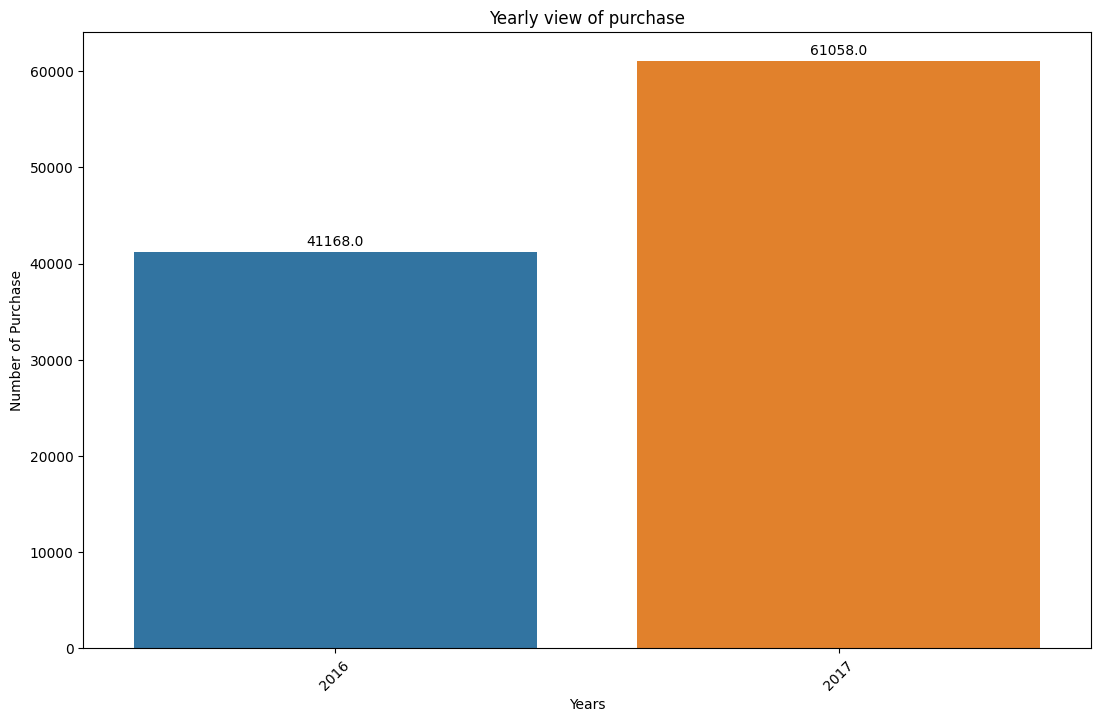

In [223]:
# menentukan jumlah pembelian berdasarkan tahun
purchase_per_year = data.groupby('year').agg({'purchase_id':'count'}).reset_index().sort_values(by='purchase_id', ascending=False)

# membuat grafik batang plot
plt.figure(figsize=(13, 8))
ax = sns.barplot(data = purchase_per_year, x='year', y='purchase_id')

# menambahkan judul dan keterangan
plt.xlabel("Years")
plt.ylabel("Number of Purchase")
plt.title("Yearly view of purchase");

# label data
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 8), 
                textcoords = 'offset points')

# memutar label sumbu x
for item in ax.get_xticklabels():
    item.set_rotation(45)

plt.show()

,date,purchase_id
67,2017-02-28,1714
66,2017-02-27,784
65,2017-02-25,969
64,2017-02-24,1265
63,2017-02-23,1569
62,2017-02-22,1562
61,2017-02-21,1362
60,2017-02-20,823
59,2017-02-18,815
58,2017-02-17,1710


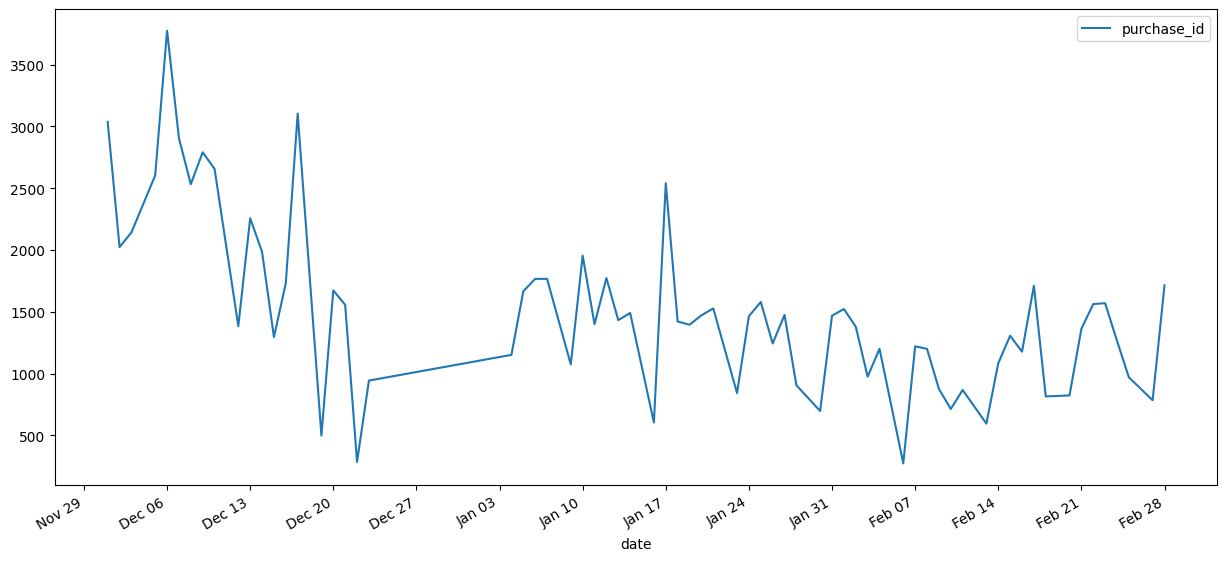

In [224]:
# menentukan jumlah pembelian berdasarkan tanggal
purchase_per_date = data.groupby('date').agg({'purchase_id':'count'}).reset_index().sort_values(by='date', ascending=False)
display(purchase_per_date.head(10))

# menetapkan tanggal sebagai index
purchase_per_date.set_index('date',inplace=True)

# plot data
fig, ax = plt.subplots(figsize=(15,7))
purchase_per_date.plot(ax=ax)

# menetapkan centang di setiap pekan
ax.xaxis.set_major_locator(mdates.WeekdayLocator())

# menetapkan format major tick
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

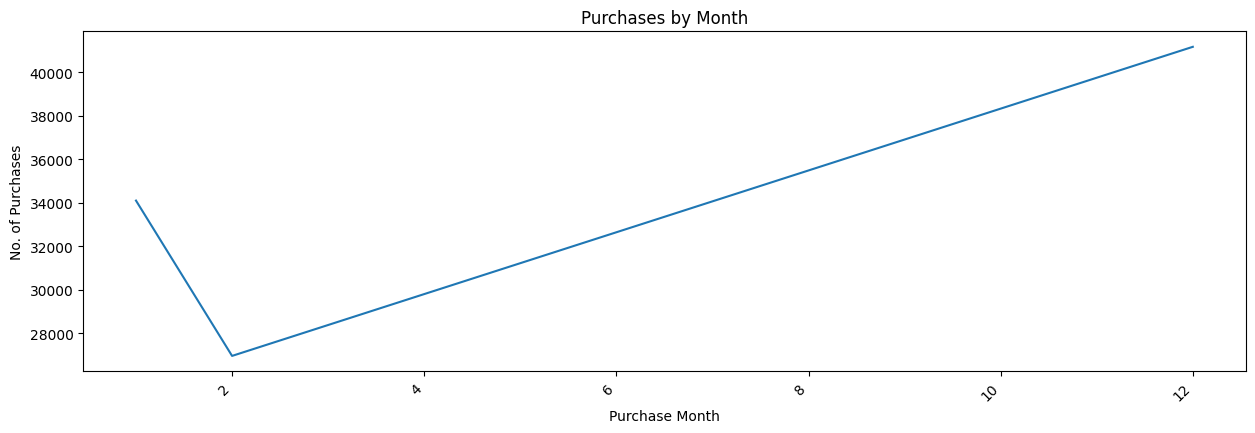

In [225]:
# menentukan jumlah pembelian berdasarkan bulan
purchase_per_month = data.groupby('month').agg({'purchase_id':'count'}).reset_index().sort_values(by='month', ascending=False)

fig, ax = plt.subplots(figsize = (15,5))  
ax.plot(purchase_per_month['month'],purchase_per_month['purchase_id'])
plt.gcf().autofmt_xdate(rotation=45)

plt.title('Purchases by Month')
plt.ylabel('No. of Purchases')
plt.xlabel('Purchase Month')
plt.show()

,year,loyalty_program,purchase_id
2,2017,0,47678
3,2017,1,13380
0,2016,0,31575
1,2016,1,9593


Text(0.5, 1.0, 'Yearly view of purchase')

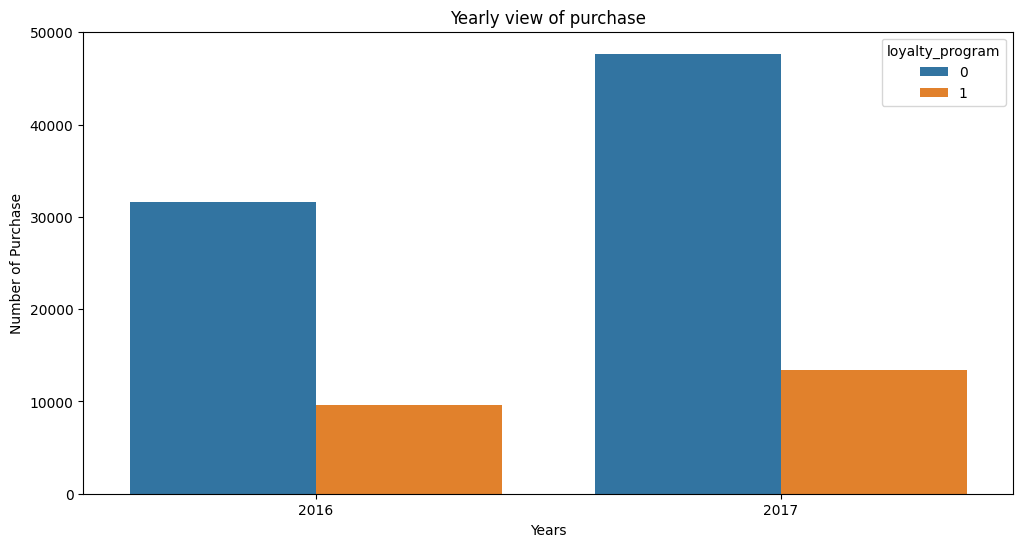

In [226]:
# pengelompokan berdasarkan program_loyalitas
purchase_per_year_loyalty = data.groupby(['year','loyalty_program']).agg({'purchase_id':'count'}).reset_index().sort_values(by='year', ascending=False)
display(purchase_per_year_loyalty)

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x="year", y='purchase_id', data=purchase_per_year_loyalty, hue="loyalty_program")

# menambahkan judul & keterangan
plt.xlabel("Years")
plt.ylabel("Number of Purchase")
plt.title("Yearly view of purchase")

**Kesimpulan Sementara :**

Berdasarkan plotting di atas, jumlah pembelian pada tahun 2017 lebih banyak dibandingkan dengan tahun 2016. Namun berdasarkan breakdown plotting, pelanggan tanpa loyalty program melakukan pembelian lebih banyak dibandingkan dengan yang memiliki loyalty program. Mari kita lakukan penyelidikan lebih lanjut mengapa ini terjadi.

In [227]:
# menentukan jumlah pembelian berdasarkan perincian tahun berdasarkan ID outlet
purchase_per_year_perstore = data.groupby(['year','shop_id']).agg({'purchase_id':'count'}).reset_index().sort_values(by='purchase_id', ascending=False)
display(purchase_per_year_perstore)

,year,shop_id,purchase_id
31,2017,Shop 0,21667
0,2016,Shop 0,16289
32,2017,Shop 1,1908
46,2017,Shop 22,1696
48,2017,Shop 24,1681
...,...,...,...
9,2016,Shop 17,617
14,2016,Shop 21,612
23,2016,Shop 3,556
25,2016,Shop 4,490


**Kesimpulan Sementara :**

Berdasarkan tabel di atas, kita dapat mengatakan bahwa 'Shop 0' adalah yang paling populer untuk tahun 2016 dan 2017 karena memiliki jumlah pembelian tertinggi.

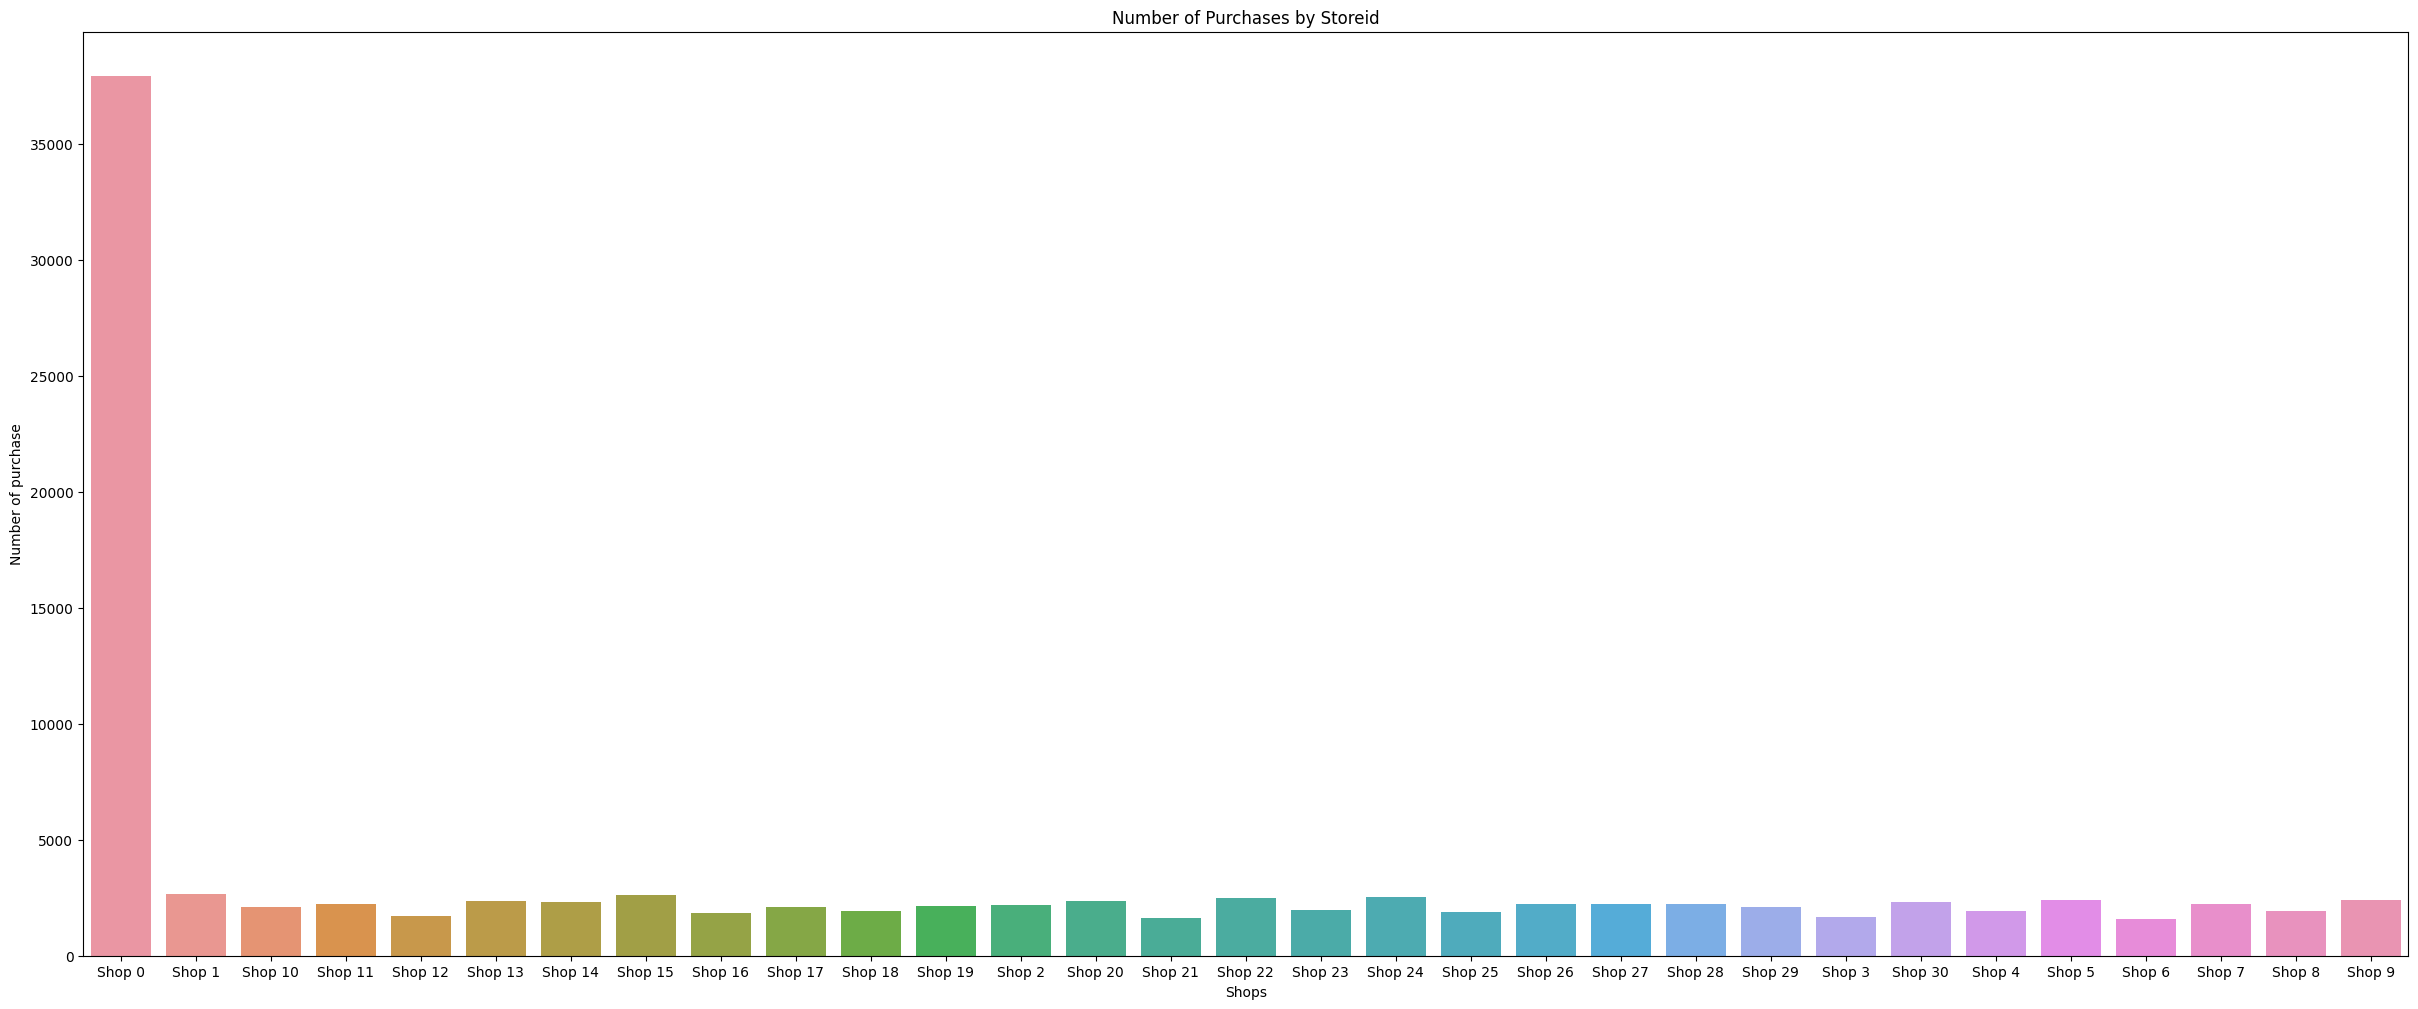

In [228]:
# menentukan jumlah rincian pembelian berdasarkan storeID
# diagram plotbar menunjukkan jumlah pembelian berdasarkan ID outlet
purchase_per_year = data.groupby('shop_id')['purchase_id'].count().reset_index()

fig, ax = plt.subplots(figsize=(30,12))
sns.barplot(x=purchase_per_year.shop_id, y='purchase_id'
            , data=purchase_per_year
            , ax=ax
            , capsize=10)
plt.xlabel("Shops")
plt.ylabel("Number of purchase")
plt.title("Number of Purchases by Storeid");
plt.show()

**Kesimpulan Sementara :**

Berdasarkan plotting di atas, 'shop 0' memiliki penjualan tertinggi dibandingkan outlet lainnya. Sepertinya 'shop 0' adalah satu-satunya outlet yang menghasilkan pendapatan.

,shop_id,purchase_id,purchase%
0,Shop 0,827,0.808992
1,Shop 1,946,0.925401
2,Shop 10,632,0.618238
3,Shop 11,913,0.893119
4,Shop 12,565,0.552697


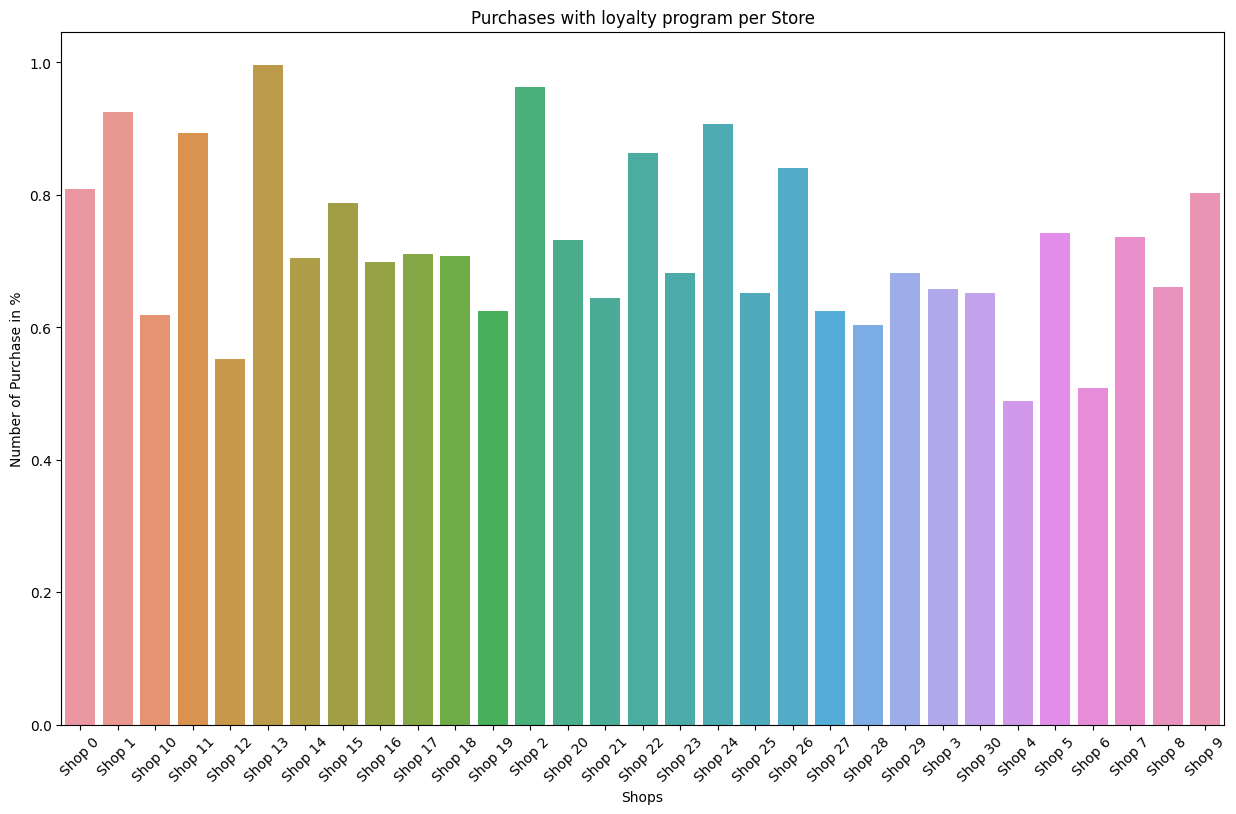

In [229]:
# breakdown berdasarkan pembelian berdasarkan program loyalitas
purchase_with_loyalty = data[data.loyalty_program == 1]
plot_withloyalty = purchase_with_loyalty.groupby('shop_id')['purchase_id'].count().reset_index()

plot_withloyalty['purchase%'] = (plot_withloyalty['purchase_id']/data.purchase_id.count()) * 100
display(plot_withloyalty.head(5))

# grafik plotbar
plt.figure(figsize=(15, 9))
ax = sns.barplot(data = plot_withloyalty, x='shop_id', y='purchase%')

# menambahkan judul dan keterangan
plt.xticks(rotation=45)
plt.title('Purchases with loyalty program per Store')
plt.xlabel('Shops')
plt.ylabel('Number of Purchase in %')
plt.show()

,shop_id,purchase_id,purchase%
0,Shop 0,37129,36.320506
1,Shop 1,1699,1.662004
2,Shop 10,1461,1.429186
3,Shop 11,1307,1.278540
4,Shop 12,1148,1.123002


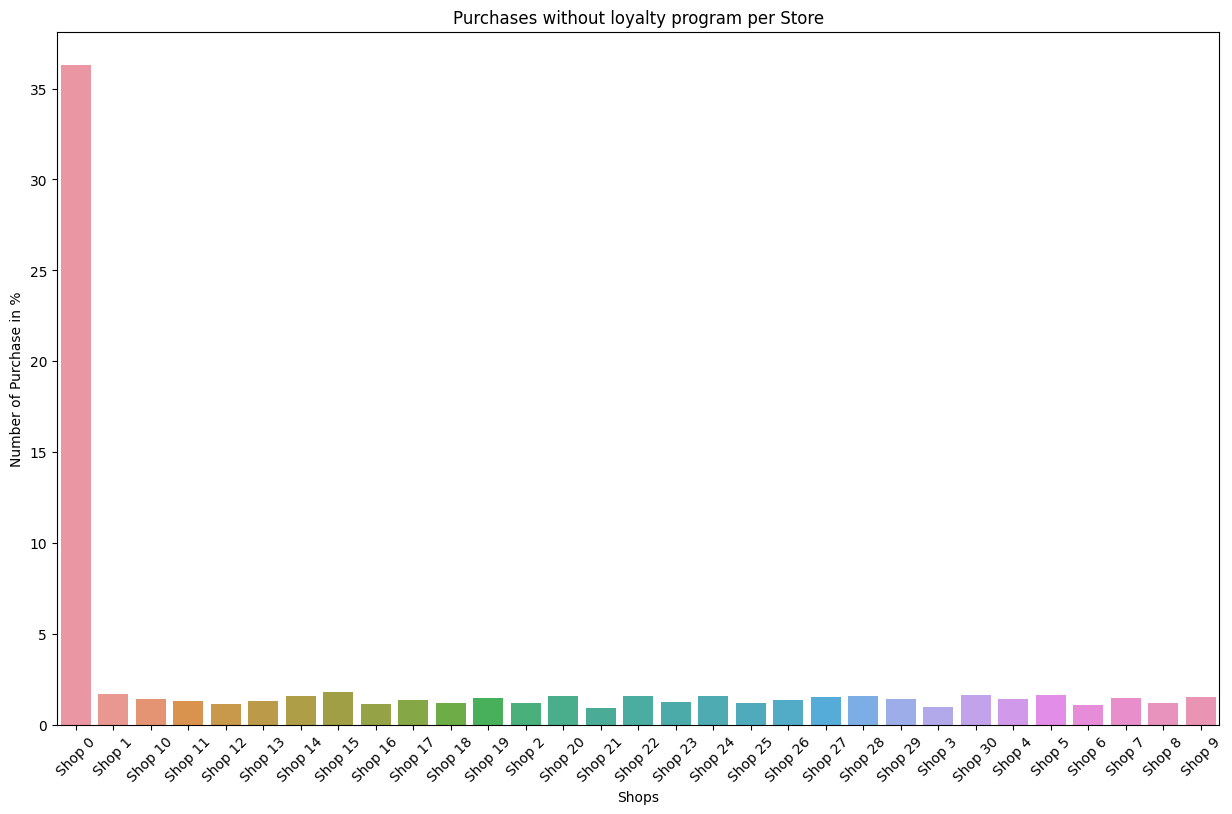

In [230]:
purchase_without_loyalty = data[data.loyalty_program == 0]
plot_withoutloyalty = purchase_without_loyalty.groupby('shop_id')['purchase_id'].count().reset_index()

plot_withoutloyalty['purchase%'] = (plot_withoutloyalty['purchase_id']/data.purchase_id.count()) * 100
display(plot_withoutloyalty.head(5))

# grafik plotbar
plt.figure(figsize=(15, 9))
ax = sns.barplot(data = plot_withoutloyalty, x='shop_id', y='purchase%')

# menambahkan judul dan keterangan
plt.xticks(rotation=45)
plt.title('Purchases without loyalty program per Store')
plt.xlabel('Shops')
plt.ylabel('Number of Purchase in %')
plt.show()

**Kesimpulan Sementara :**

Berdasarkan plotting di atas, tren pembelian berubah dengan pelanggan yang merupakan bagian dari program loyalitas atau tidak. Pelanggan yang memiliki program loyalitas cenderung membeli hampir merata di setiap outlet sedangkan pelanggan yang tidak memiliki program loyalitas cenderung hanya membeli di satu outlet yaitu 'Shop 0'.

,day,purchase_id
0,1,4558
1,2,3402
2,3,3117
3,4,2351
4,5,4268
5,6,5813
6,7,5890
7,8,3732
8,9,4740
9,10,5323


,month,purchase_id
2,12,41168
1,2,26959
0,1,34099


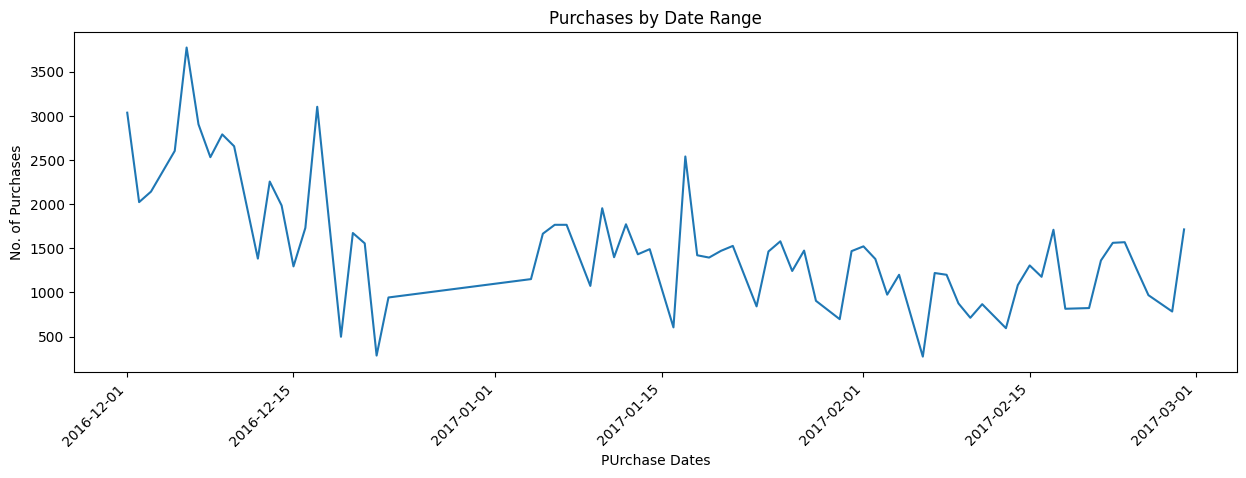

In [231]:
# breakdown berdasarkan pembelian yang dilakukan dalam sehari
purchase_per_day = data.groupby('day').agg({'purchase_id':'count'}).reset_index()
display(purchase_per_day.head(10))

purchase_per_month = data.groupby('month').agg({'purchase_id':'count'}).reset_index().sort_values(by='month', ascending=False)
display(purchase_per_month.head())

purchase_per_date = data.groupby('date').agg({'purchase_id':'count'}).reset_index().sort_values(by='date', ascending=False)

fig, ax = plt.subplots(figsize = (15,5))  
ax.plot(purchase_per_date['date'],purchase_per_date['purchase_id'])
plt.gcf().autofmt_xdate(rotation=45)
plt.title('Purchases by Date Range')
plt.ylabel('No. of Purchases')
plt.xlabel('PUrchase Dates')
plt.show()

**Kesimpulan Sementara :**

Berdasarkan plotting di atas, jumlah pembelian lebih tinggi pada pertengahan bulan sedangkan jumlah pembelian perlahan naik setelah bulan Februari dan tertinggi pada bulan Desember.

In [232]:
# periksa berapa banyak pembelian yang dilakukan per pelanggan?
# periksa apakah mereka memiliki program loyalitas?

purchase_percustomer_withoutLoyalty = purchase_without_loyalty.groupby('customer_id')['purchase_id'].count().reset_index().sort_values(by='purchase_id', ascending=False)
display(purchase_percustomer_withoutLoyalty.head(10))

,customer_id,purchase_id
135,18427,772
661,20285,724
850,20990,693
747,20590,506
672,20325,467
233,18768,447
773,20718,426
567,19977,362
230,18760,318
525,19835,307


In [233]:
purchase_percustomer_withLoyalty = purchase_with_loyalty.groupby('customer_id')['purchase_id'].count().reset_index().sort_values(by='purchase_id', ascending=False)
display(purchase_percustomer_withLoyalty.head(10))

,customer_id,purchase_id
435,23520,738
525,23797,318
439,23529,297
427,23490,249
285,23016,244
286,23017,239
340,23190,214
172,22610,196
524,23795,195
370,23290,192


**Kesimpulan Sementara :**

Berdasarkan tabel di atas, rata-rata jumlah pembelian per pelanggan hampir sama dengan pelanggan dengan program loyalitan dan tanpa program loyalitas. Pembelian tertinggi yang dilakukan adalah sekitar 700 per pelanggan.

In [234]:
# produk apa yang paling banyak dibeli pelanggan?
product_per_customer = data.groupby('product_id')['customer_id'].count().reset_index().sort_values(by='customer_id', ascending=False)
display(product_per_customer.head(5))

,product_id,customer_id
2653,85123A,491
1272,22423,360
1315,22469,317
1553,22720,307
1316,22470,268


In [235]:
topstores = data[data['product_id'].isin(['85123A'])]
print(sorted(topstores['shop_id'].unique()))

['Shop 0', 'Shop 1', 'Shop 10', 'Shop 11', 'Shop 12', 'Shop 13', 'Shop 14', 'Shop 15', 'Shop 16', 'Shop 17', 'Shop 18', 'Shop 19', 'Shop 2', 'Shop 20', 'Shop 21', 'Shop 22', 'Shop 23', 'Shop 24', 'Shop 25', 'Shop 26', 'Shop 27', 'Shop 28', 'Shop 29', 'Shop 3', 'Shop 30', 'Shop 4', 'Shop 5', 'Shop 6', 'Shop 7', 'Shop 8', 'Shop 9']


**Kesimpulan Sementara :**

Berdasarkan tabel di atas, produk dengan id '85123A', '22423', '22469', '22720', '22470' merupakan produk yang paling banyak dibeli oleh pelanggan. Produk-produk ini milik outlet yang tercantum di atas.

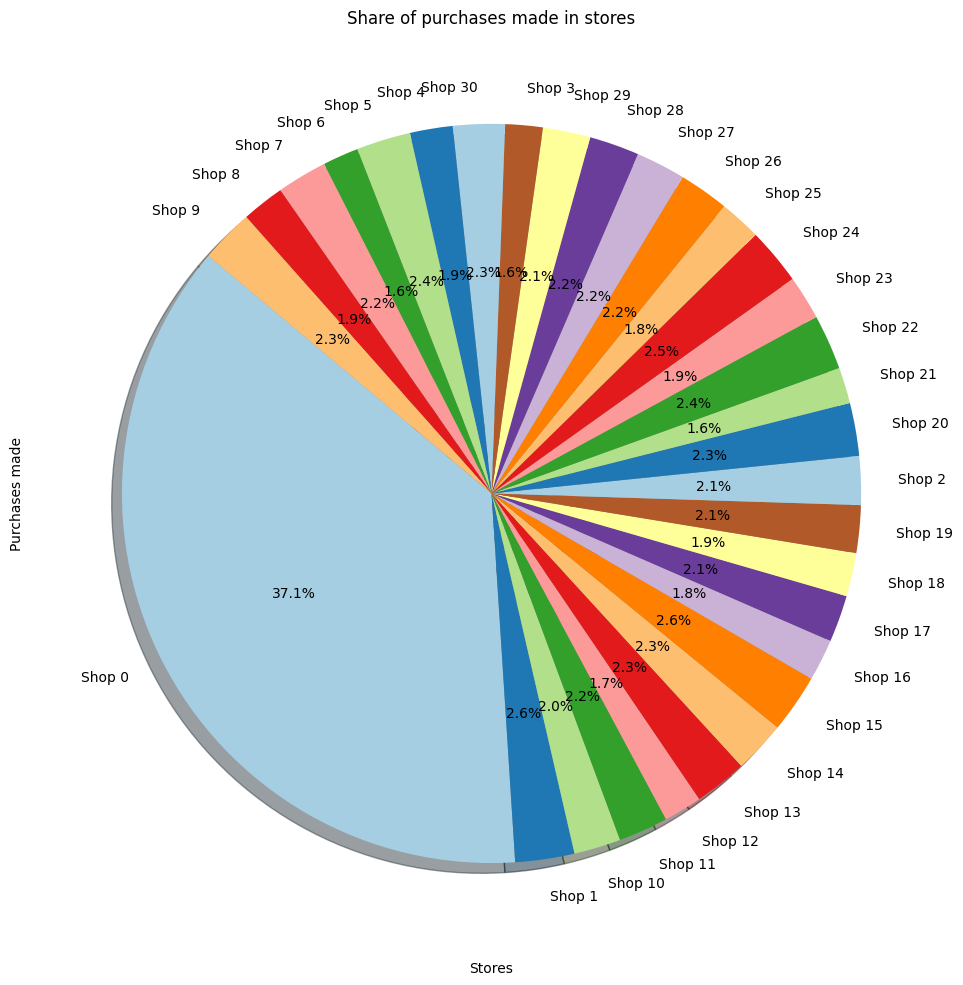

In [236]:
# menentukan bagian pembelian yang dilakukan di outlet yang berbeda
purchase_per_store = data.groupby('shop_id')['purchase_id'].count().reset_index()

# mengekstrak data untuk diagram lingkaran
stores = purchase_per_store['shop_id']
purchases = purchase_per_store['purchase_id']

# menentukan warna untuk irisan diagram lingkaran
colors = plt.cm.Paired.colors

# membuat diagram pie
fig, ax = plt.subplots(figsize=(15, 12))
wedges, texts, autotexts = ax.pie(purchases, labels=stores, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# menambahkan interaktivitas - explode a slice on click
def explode_slice(event):
    if event.inaxes == ax:
        wedge = event.inaxes.pie(purchases, labels=stores, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, explode=[0 if w != event.artist else 0.1 for w in wedges])
        event.inaxes.set_aspect('equal')
        plt.show()

fig.canvas.mpl_connect('button_press_event', explode_slice)

# menambahkan judul dan label sumbu
plt.title('Share of purchases made in stores')
plt.xlabel('Stores')
plt.ylabel('Purchases made')

# menampilkan plot
plt.show()

**Kesimpulan Sementara :**

Berdasarkan grafik di atas, 37% pembelian dilakukan di 'Shop 0' sedangkan 2-3% pembelian dilakukan di outlet lainnya. Sepertinya setengah dari pelanggan tidak memiliki program loyalitas. Namun yang memiliki membeli secara merata di semua outlet sedangkan yang tidak memiliki kebanyakan membeli di Shop 0. Sepertinya Shop 0 tidak memiliki loyalty_program untuk pelanggan, tetapi masih populer di kalangan pelanggan.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

In [237]:
# Seberapa besar pengaruh program loyalitas? Apakah pelanggan dengan atau tanpa program loyalitas membeli lebih banyak atau lebih sedikit?
loyalty = data.groupby('loyalty_program')['purchase_id'].count().reset_index()
loyalty

,loyalty_program,purchase_id
0,0,79253
1,1,22973


**Kesimpulan :**

Berdasarkan tabel dan ploting di atas, jumlah pembelian yang dilakukan oleh pelanggan tidak tergantung pada keanggotaan program loyalitas. Faktanya, mayoritas pelanggan bahkan tidak memiliki program loyalitas. Pelanggan lebih memilih tidak membayar ekstra 20 dolar dan lebih lebih banyak membeli di outlet yang terjangkau seperti 'Shop 0'. Namun, ada beberapa pelanggan yang akan membayar 20 dolar per bulan untuk keanggotaan loyalitas dan membeli barang mahal dan berkualitas di outlet lain menggunakan diskon dan promosi.

,shop_id,customer_id
0,Shop 0,112
1,Shop 1,112
2,Shop 10,96
3,Shop 11,115
4,Shop 12,94


103.13

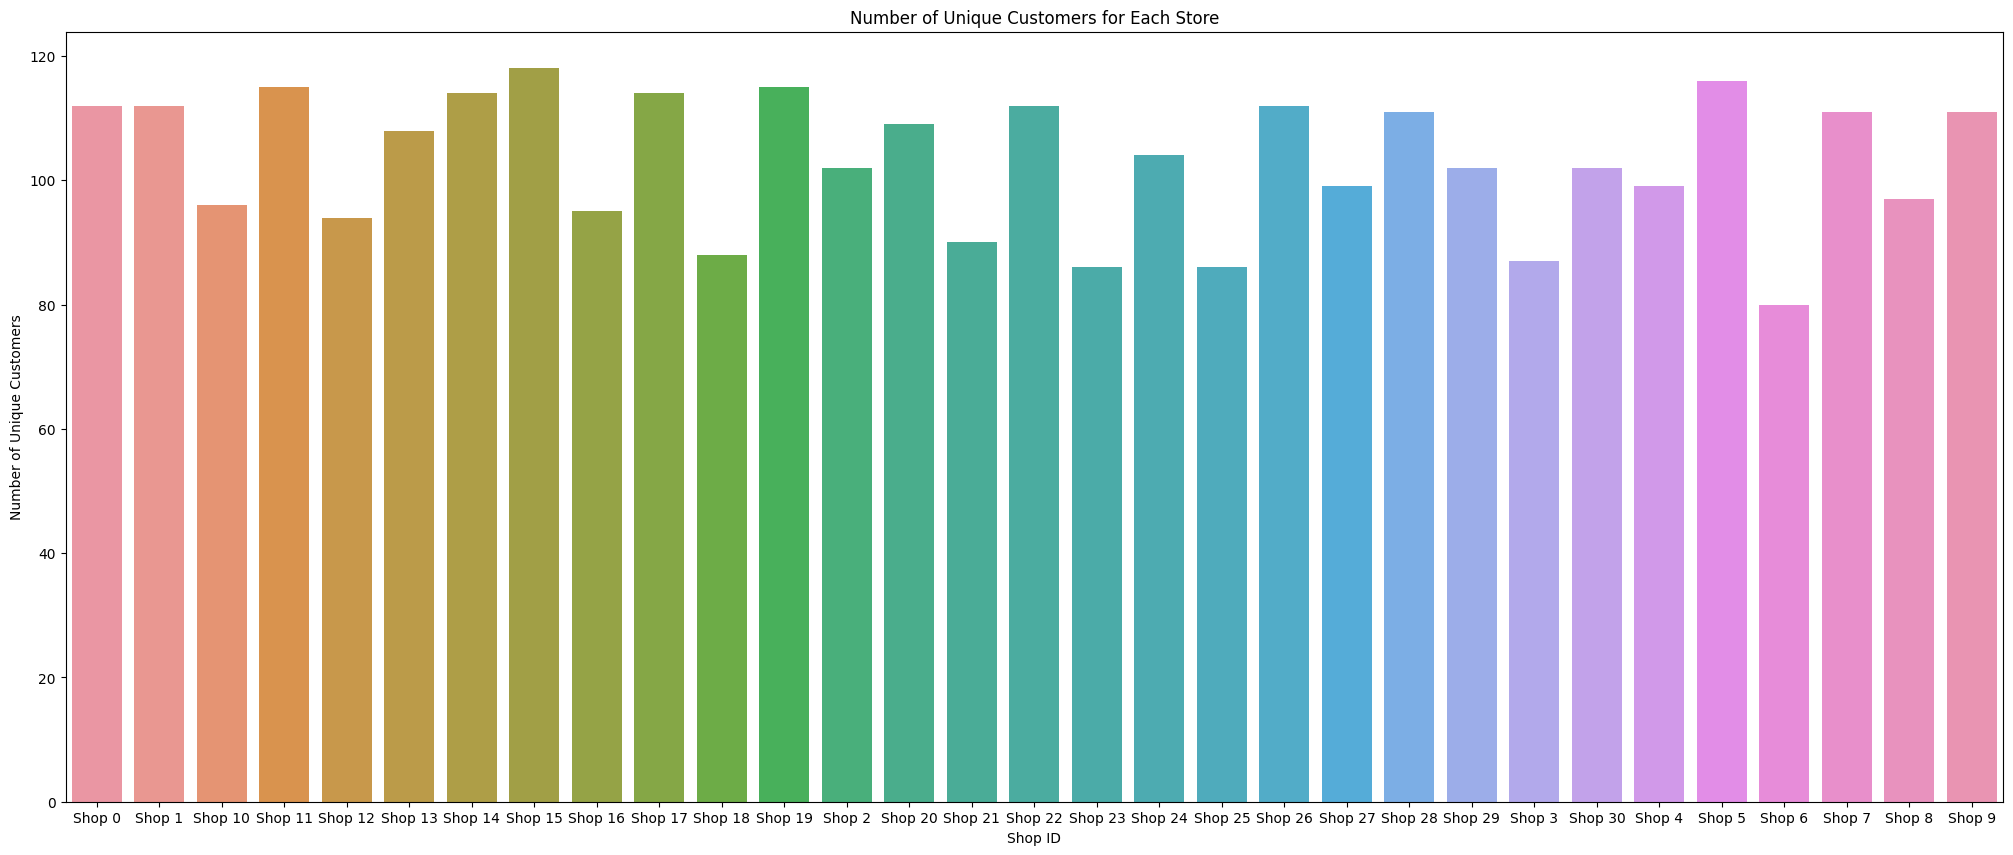

In [238]:
# menentukan pelanggan unik di outlet yang berbeda
unique_customer_per_store = data.groupby('shop_id')['customer_id'].nunique().reset_index()
display(unique_customer_per_store.head(5))
display(unique_customer_per_store['customer_id'].mean().round(decimals=2))

# membuat barplot
plt.figure(figsize=(25, 10))
sns.barplot(x='shop_id', y='customer_id', data=unique_customer_per_store)
plt.xlabel('Shop ID')
plt.ylabel('Number of Unique Customers')
plt.title('Number of Unique Customers for Each Store')
plt.show()

**Kesimpulan :**

Berdasarkan tabel dan ploting di atas, Jumlah pelanggan unik tiap outlet hampir sama, yaitu rata-rata sekitar 103 pelanggan tiap outlet.

,shop_id,avg_purchase
0,Shop 0,932.437500
1,Shop 1,196.928571
2,Shop 10,301.197917
3,Shop 11,181.026087
4,Shop 12,192.617021
5,Shop 13,277.407407
6,Shop 14,175.991228
7,Shop 15,917.372881
8,Shop 16,203.010526
9,Shop 17,182.991228


291.81

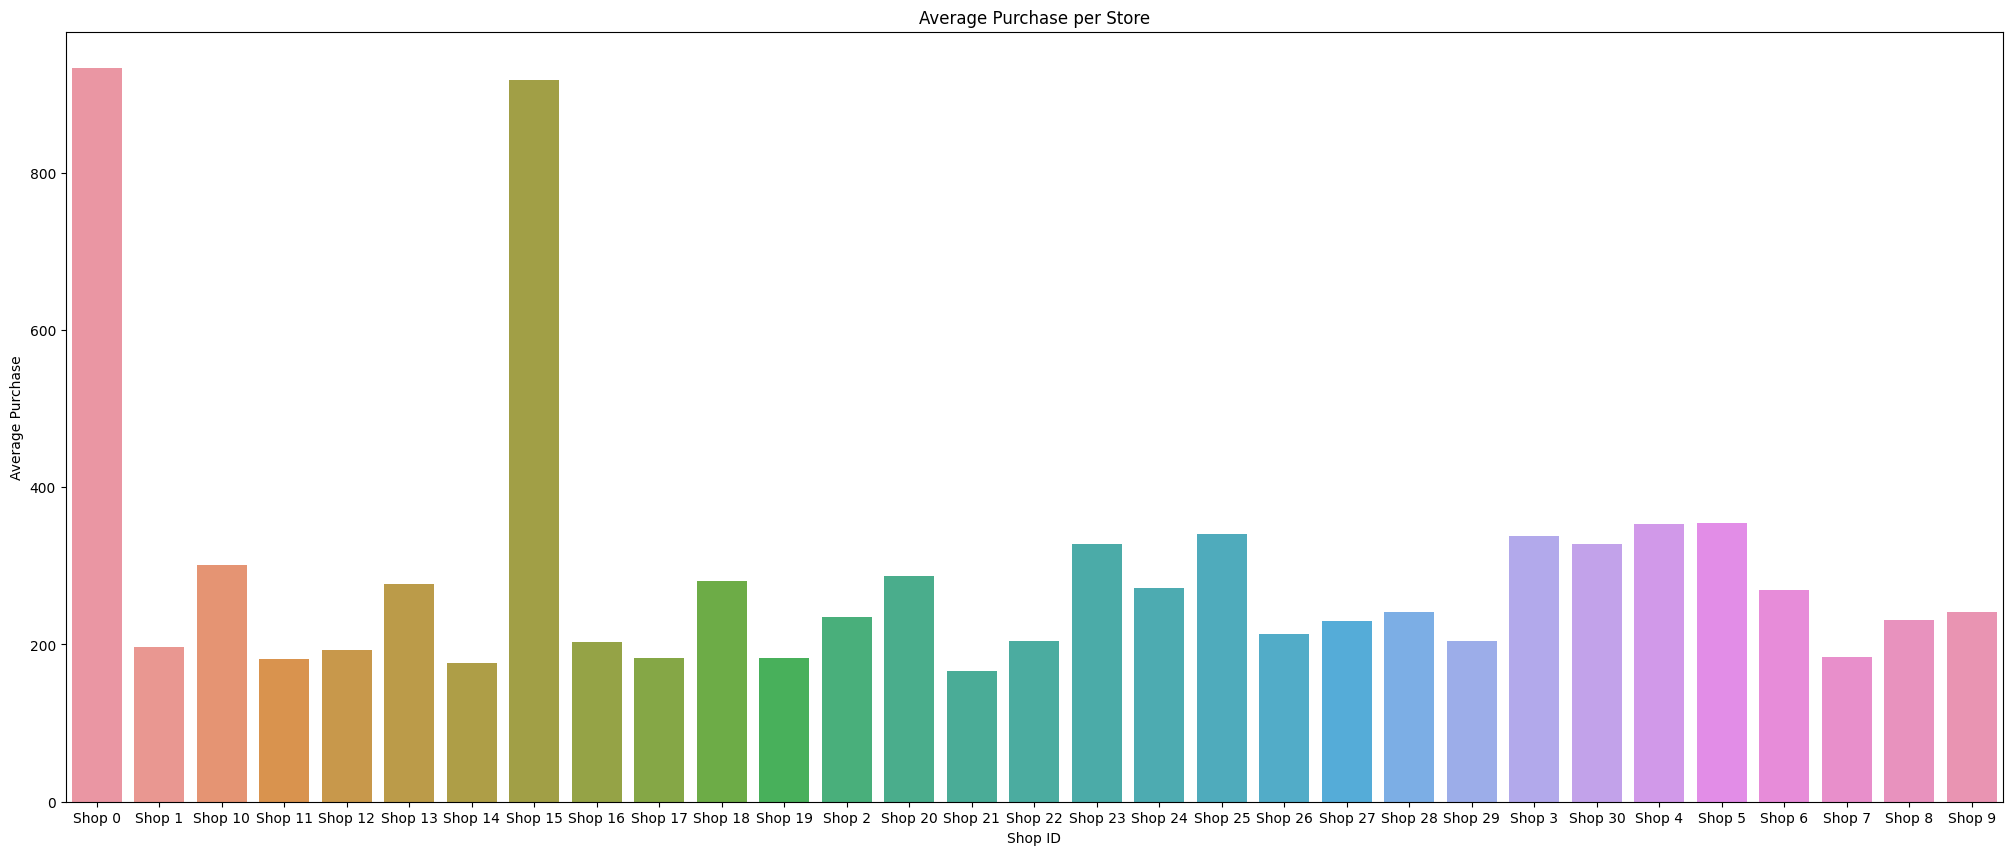

In [239]:
total_purchase_per_store = data.groupby('shop_id')['quantity'].sum()
number_of_customers_per_store = data.groupby('shop_id')['customer_id'].nunique()
average_purchase_per_customer_per_store = total_purchase_per_store / number_of_customers_per_store

avg = average_purchase_per_customer_per_store.reset_index()
avg.columns = ['shop_id', 'avg_purchase']
display(avg.head(10))
display(avg['avg_purchase'].mean().round(decimals=2))

# membuat bar plot
plt.figure(figsize=(25, 10))
sns.barplot(x='shop_id', y='avg_purchase', data=avg)
plt.xlabel('Shop ID')
plt.ylabel('Average Purchase')
plt.title('Average Purchase per Store')
plt.show()

**Kesimpulan :**

Berdasarkan tabel dan ploting di atas, rata-rata pembelian untuk tiap outlet paling tinggi di Shop 0 dan Shop 15, namun secara keseluruhan rata-rata pembelian seluruh outlet yaitu 291.81 pembelian.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Kinerja Outlet

Periksa setiap outlet untuk:

1. Barang apa yang paling banyak terjual
2. Berapa banyak pembelian per outlet
3. Bagaimana kinerja outlet selama periode waktu tertentu dalam kumpulan data
4. Apakah pembeli pergi ke outlet yang berbeda
5. Apakah barang tertentu terjual lebih baik di outlet yang berbeda

### Barang apa yang paling banyak terjual

In [240]:
item_count = data.groupby(['product_id']).agg({'purchase_id':'count',
                                                 'price_per_product':'sum'})
item_count.columns = ['purchase_count','value_of_orders']
item_count.sort_values('purchase_count',ascending=False)

,purchase_count,value_of_orders
product_id,,
85123A,545,0.00
22423,442,0.00
22469,410,594.50
22720,366,1555.50
85099B,363,0.00
...,...,...
84963A,1,42.95
22351,1,0.00
84922,1,4.25


**Kesimpulan :**

Berdasarkan tabel di atas, item yang paling banyak terjual adalah item yang dengan harga $0. Mungkin produk gratis?

In [241]:
# mengurutkan berdasarkan nilai pesanan
item_count.sort_values('value_of_orders',ascending=False)

,purchase_count,value_of_orders
product_id,,
22655,18,2250.00
22720,366,1555.50
22827,10,1450.00
21843,145,1442.75
85066,118,1292.10
...,...,...
84465,2,0.00
84497,4,0.00
84499,2,0.00


In [242]:
# untuk memvisualisasikan distribusi nilai dan tidak akan menyaring angka nol
item_count= item_count.query('value_of_orders >0').sort_values('value_of_orders',ascending=False)
item_count.head()

,purchase_count,value_of_orders
product_id,,
22655,18,2250.00
22720,366,1555.50
22827,10,1450.00
21843,145,1442.75
85066,118,1292.10


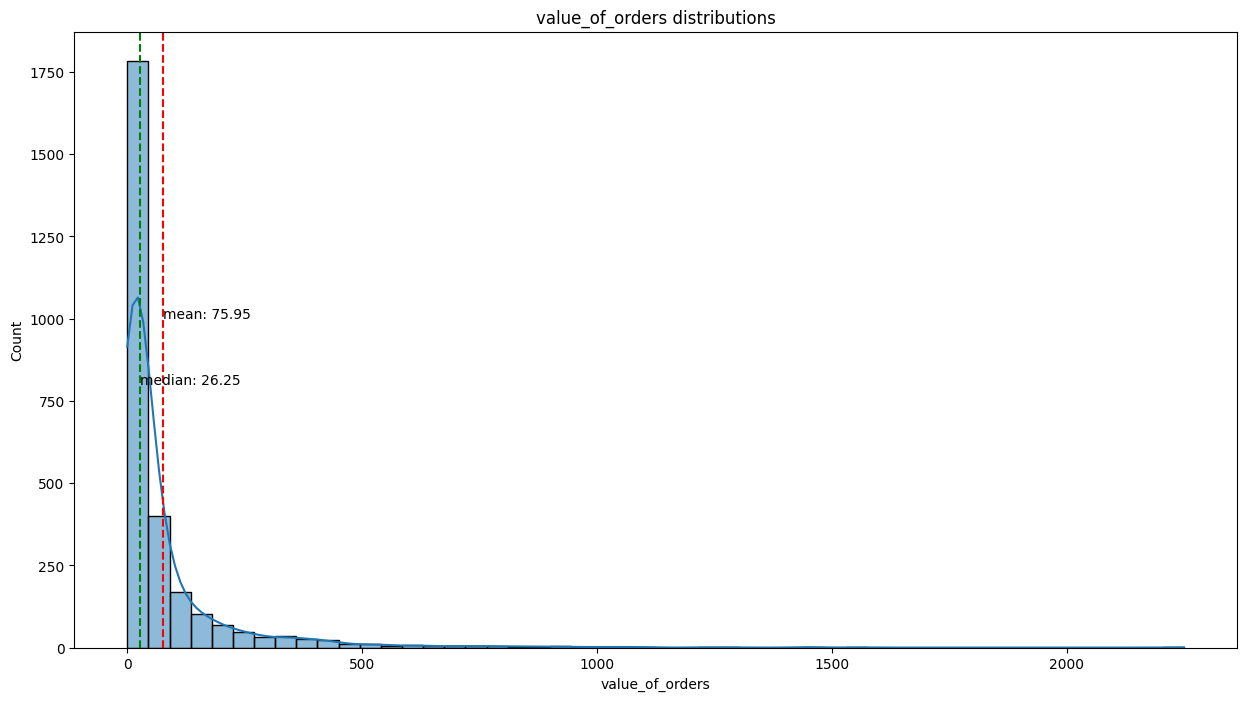

In [243]:
plt.figure(figsize=(15, 8))
sns.histplot(data=item_count ,x='value_of_orders',bins=50,kde=True).set_title('value_of_orders distributions');

plt.axvline(item_count['value_of_orders'].mean(),color='red',linestyle='--');
plt.text(x = item_count['value_of_orders'].mean(),y = 1000,s = 'mean: {:.2f}'.format(item_count['value_of_orders'].mean()));

plt.axvline(item_count['value_of_orders'].median(),color='green',linestyle='--');
plt.text(x = item_count['value_of_orders'].median(),y = 800,s = 'median: {:.2f}'.format(item_count['value_of_orders'].median()));


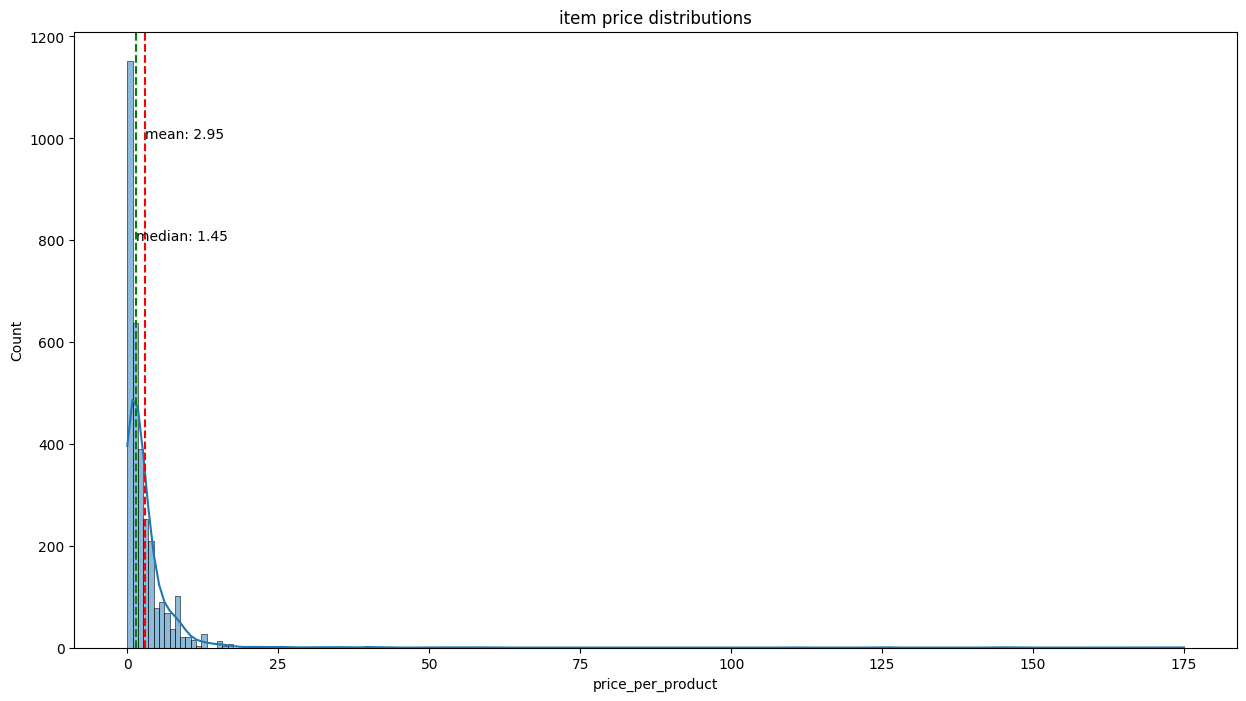

In [244]:
plt.figure(figsize=(15, 8))
sns.histplot(data=product ,x='price_per_product',bins=200,kde=True).set_title('item price distributions');

plt.axvline(product['price_per_product'].mean(),color='red',linestyle='--');
plt.text(x = product['price_per_product'].mean(),y = 1000,s = 'mean: {:.2f}'.format(product['price_per_product'].mean()));

plt.axvline(product['price_per_product'].median(),color='green',linestyle='--');

plt.text(x = product['price_per_product'].median(),y = 800,s = 'median: {:.2f}'.format(product['price_per_product'].median()));


**Kesimpulan :**

Dengan mencari barang terlaris kami menemukan bahwa yang teratas tidak memiliki harga, hal ini membuat kami memikirkan kembali pertanyaan tersebut dan malah menanyakan barang apa yang paling menguntungkan.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

### Barang apa yang paling menguntungkan di setiap outlet

In [245]:
shops_grouping = data.groupby(['shop_id','product_id']).agg({'product_id':'count',
                                                              'price_per_product':'sum'})
shops_grouping.columns = ['item_count','value_of_order']
shops_grouping = shops_grouping.sort_values('value_of_order',ascending=False)

# ekstrak item_id terlaris dan nilainya per outlet
shops_list = list(data.shop_id.value_counts().index)
top_item_id = []
top_item_value = []

for s in shops_list :
    top_item_id.append(shops_grouping.xs((s))[0:1]['value_of_order'].index[0])
    top_item_value.append(shops_grouping.xs((s))[0:1]['value_of_order'].values[0])
    
shops_top_items = zip(shops_list,top_item_id,top_item_value)
top_items_df =pd.DataFrame(shops_top_items)

In [246]:
shops_top_items = zip(shops_list,top_item_id,top_item_value)

# item terlaris per outlet
top_items_df.columns = ['shop_id','item_id','total_order_value']
top_items_df.sort_values('total_order_value',ascending=False).head()

,shop_id,item_id,total_order_value
0,Shop 0,DOT,436.74
9,Shop 14,22655,250.00
8,Shop 13,22823,220.00
10,Shop 30,22826,175.00
4,Shop 22,22929,173.85


In [247]:
# kita lihat apakah ada barang yang paling laris di beberapa outlet
top_items_df.groupby('item_id')['shop_id'].count().sort_values(ascending=False)

item_id
22655    8
22827    8
21843    2
22720    2
22823    2
21485    1
21754    1
22192    1
22824    1
22826    1
22828    1
22849    1
22929    1
DOT      1
Name: shop_id, dtype: int64

**Kesimpulan :**

Item 22655 dan 22827 adalah item penjual teratas di 8 outlet.

### Berapa banyak pembelian per outlet

In [248]:
customers_per_shop = data.groupby('shop_id').agg({'customer_id':'count',                                                         
                                                         'product_id':'nunique'}).sort_values('customer_id',ascending=False).reset_index()
customers_per_shop.columns = ['shop_id','purchase_count','unique_items_sold']

display(customers_per_shop.head(10))
display(customers_per_shop['purchase_count'].mean().round(decimals=2))
display(customers_per_shop['unique_items_sold'].mean().round(decimals=2))

,shop_id,purchase_count,unique_items_sold
0,Shop 1,2645,1232
1,Shop 15,2618,1216
2,Shop 24,2535,1180
3,Shop 22,2469,1161
4,Shop 5,2423,1107
5,Shop 9,2390,1143
6,Shop 20,2367,1191
7,Shop 13,2357,1076
8,Shop 14,2328,1150
9,Shop 30,2313,1093


2140.84

1112.13

**Kesimpulan :**

Rata-rata pembelian tiap outlet sebanyak 2141 pembelian dengan rata-rata 1112 item terjual.

### Bagaimana kinerja outlet selama periode waktu tertentu dalam kumpulan data

In [249]:
shops_purchase_by_date = data.groupby(['date','shop_id']).agg({'purchase_id':'count',
                                                                     'price_per_product':'mean'}).reset_index()
shops_purchase_by_date.columns = ['date','shop_id','purchased_quantity','price_avg']
shops_purchase_by_date.head()

,date,shop_id,purchased_quantity,price_avg
0,2016-12-01,Shop 0,1235,1.828202
1,2016-12-01,Shop 1,36,3.760278
2,2016-12-01,Shop 10,155,2.392000
3,2016-12-01,Shop 11,90,1.573667
4,2016-12-01,Shop 12,25,8.341200


In [250]:
fig = px.line(shops_purchase_by_date, x="date", y="price_avg", color='shop_id',title='avg sale per shop')
fig.show()

In [251]:
shops_purchase_by_date.sort_values('price_avg',ascending=False).head()

,date,shop_id,purchased_quantity,price_avg
707,2017-01-13,Shop 18,1,125.000000
401,2016-12-17,Shop 12,2,62.860000
1004,2017-01-28,Shop 25,1,34.950000
802,2017-01-18,Shop 4,5,24.038000
699,2017-01-12,Shop 7,16,17.133125


**Kesimpulan :**

Terlihat bahwa Shop 12, Shop 18, dan Shop 25 memiliki puncak yang menarik pada tanggal yang berbeda.

### Apakah pembeli pergi ke outlet yang berbeda

In [252]:
shops_per_buyer = pd.DataFrame(data.groupby(['customer_id'])['shop_id'].nunique().reset_index())
shops_per_buyer.columns =['customer_id','number_of_shops']
shops_per_buyer.sort_values('number_of_shops',ascending=False).head(10)

,customer_id,number_of_shops
135,18427,21
1556,23529,20
850,20990,19
661,20285,18
233,18768,16
1552,23520,16
781,20740,16
747,20590,15
567,19977,13
196,18650,13


**Kesimpulan :**

Di sini kita melihat bahwa klien yang berbeda berbelanja atau memesan dari outlet yang berbeda.

### Apakah barang tertentu terjual lebih baik di outlet yang berbeda

In [253]:
shops_grouping = data.groupby(['shop_id','product_id']).agg({'product_id':'count',
                                                              'price_per_product':'sum'})
shops_grouping.columns = ['item_count','value_of_order']
shops_grouping = shops_grouping.sort_values('item_count',ascending=False)
display(shops_grouping)

item_count  value_of_order
shop_id product_id                            
Shop 0  DOT                174          436.74
        85099B             123            0.00
        22197              112           80.64
        22469              106          153.70
        22379               98          181.30
...                        ...             ...
Shop 25 22531                1            0.42
        22530                1            0.36
Shop 15 22521                1            0.85
        22522                1            0.72
Shop 22 22152                1            0.42

[34476 rows x 2 columns]

In [254]:
shops_list =list(data.shop_id.value_counts().index)
top_item_id = []
top_item_value = []
for s in shops_list :
    top_item_id.append(shops_grouping.xs((s))[0:1]['item_count'].index[0])
    top_item_value.append(shops_grouping.xs((s))[0:1]['item_count'].values[0])
    
shops_top_items = zip(shops_list,top_item_id,top_item_value)
top_items_df =pd.DataFrame(shops_top_items)

In [255]:
# item terlaris per outlet
top_items_df.columns = ['shop_id','item_id','item_count']
top_items_df.sort_values('item_count',ascending=False).head()

,shop_id,item_id,item_count
0,Shop 0,DOT,174
7,Shop 20,85123A,23
2,Shop 15,85123A,22
19,Shop 17,85123A,21
25,Shop 25,85123A,20


In [256]:
# item yang paling banyak dipesan secara keseluruhan
pd.DataFrame(top_items_df.groupby('item_id')['item_count'].sum()).sort_values('item_count',ascending=False)

,item_count
item_id,
85123A,361
DOT,174
22423,95
22469,31
20725,13


**Kesimpulan :**

Hasil analisis menunjukkan bahwa Shop 0 memang menjual lebih baik dari outlet yang lain, dengan tercantumkan bahwa item terpopuler dan paling banyak dipesan secara umum berasal di outlet tersebut.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Pengujian Hipotesis

- Rata-rata pembelian pelanggan dengan program loyalitas sama dengan pembelian pelanggan tanpa program loyalitas.

In [257]:
# menghitung rata-rata
meanpurchase_without_loyalty = purchase_without_loyalty['quantity'].mean().round(decimals=2)
meanpurchase_with_loyalty = purchase_with_loyalty['quantity'].mean().round(decimals=2)


print('Rata-rata pembelian pelanggan dengan program loyalitas adalah: ' + str(meanpurchase_with_loyalty))
print('Rata-rata pembelian pelanggan tanpa program loyalitas adalah: ' + str(meanpurchase_without_loyalty))

# uji-t
results = st.ttest_ind(purchase_without_loyalty['quantity'], purchase_with_loyalty['quantity'], equal_var=False)
p_value = results.pvalue

# tingkat signifikansi statistikal
alpha = 0.05

print('p-value: ', results.pvalue)

if p_value < alpha:
    print('Reject hipotesis nol')
else:
    print('Tidak bisa menolak hipotesis nol')

Rata-rata pembelian pelanggan dengan program loyalitas adalah: 10.16
Rata-rata pembelian pelanggan tanpa program loyalitas adalah: 8.94
p-value:  0.23063946577410183
Tidak bisa menolak hipotesis nol


**Kesimpulan :**

- Kami menguji hipotesis bahwa rata-rata pembelian pelanggan dengan program loyalitas sama dengan pembelian pelanggan tanpa program loyalitas.
- Kami mulai dengan hipotesis nol yaitu H₀ = pembelian rata-rata pelanggan dengan atau tanpa program loyalitas adalah sama.
- Hipotesis alternatif yaitu H₁ = rata-rata pembelian pelanggan dengan atau tanpa program loyalitas tidak sama.
- Kami menggunakan alfa 0,05, yang berarti bahwa hanya dalam 5% kasus kami akan menolak hipotesis nol jika itu benar.
- Kami menggunakan uji-t untuk menguji hipotesis karena digunakan untuk membandingkan rata-rata dua kelompok untuk menentukan apakah dua kelompok berbeda satu sama lain.
- Hasil akhir menjelaskan bahwa rata-rata pembelian pelanggan dengan atau tanpa program loyalitas adalah sama.

## Kesimpulan Umum

**Pre-processing Data**

Dari eksplorasi pra-pemrosesan data, dapat disimpulkan bahwa :

1. Data menyangkut data pembelian yang dilakukan di peritel bahan bangunan Home World. Nama pada kolom disesuaikan untuk mempermudah analisa.
2. Terdapat nilai yang hilang pada kolom CustomerID dan 34.7% data namun nilai hilang tersebut bukanlah nilai hilang melainkan memang betul nilai kosong sehingga dapat diabaikan. Dtype diubah menjadi integer untuk mempermudah analisa.
3. Kolom tanggal, tahun, bulan dan hari perlu dibuat.
4. Data dilakukan optimasi untuk mengurangi storage. Yaitu dengan mengubah loyalty_program menjadi category dan date menjadi datetime.
5. Terdapat nilai duplikat sehingga dilakukan drop.
6. Terdapat data bernilai negatif pada kolom quantity sebanyak 1.9% sehingga dilakukan drop karena tidak mungkin/kesalahan pada data.

**Analisis Data Esksploratif (EDA)**

Dari hasil analisis data esksploratif, dapat disimpulkan bahwa:

1. Menurut plot Yearly view of purchase, jumlah pembelian pada tahun 2017 lebih banyak dibandingkan dengan tahun 2016. Namun berdasarkan breakdown plotting, pelanggan tanpa loyalty program melakukan pembelian lebih banyak dibandingkan dengan yang memiliki loyalty program.
2. Shop 0 merupakan outlet yang paling populer di tahun 2016 dan 2017 karena memiliki jumlah pembelian tertinggi. Bahkan menurut plot Number of Purchases by Storeid, Shop 0 memiliki penjualan tertinggi dibandingkan outlet lainnya. Sepertinya 'shop 0' adalah satu-satunya outlet yang menghasilkan pendapatan.
3. Berdasarkan plot Purchases without loyalty program per Store, Pelanggan yang memiliki program loyalitas cenderung membeli hampir merata di setiap outlet sedangkan pelanggan yang tidak memiliki program loyalitas cenderung hanya membeli di satu outlet yaitu 'Shop 0'.
4. Diketahui bahwa rata-rata jumlah pembelian per pelanggan hampir sama dengan pelanggan dengan program loyalitan dan tanpa program loyalitas. Pembelian tertinggi yang dilakukan adalah sekitar 700 per pelanggan. Produk dengan id '85123A', '22423', '22469', '22720', '22470' merupakan produk yang paling banyak dibeli oleh pelanggan.
5. Berdasarkan plot Share of purchases made in stores, 37% pembelian dilakukan di 'Shop 0' sedangkan 2-3% pembelian dilakukan di outlet lainnya. Jumlah pembelian yang dilakukan oleh pelanggan tidak tergantung pada keanggotaan program loyalitas. Faktanya, mayoritas pelanggan bahkan tidak memiliki program loyalitas. Pelanggan lebih memilih tidak membayar ekstra 20 dolar dan lebih lebih banyak membeli di outlet yang terjangkau seperti 'Shop 0'. Namun, ada beberapa pelanggan yang akan membayar 20 dolar per bulan untuk keanggotaan loyalitas dan membeli barang mahal dan berkualitas di outlet lain menggunakan diskon dan promosi.
6. Rata-rata pengguna unik tiap outlet itu sama sekitar 200 pelanggan, namun penjualan di Shop 0 lebih banyak dari penjualan di outlet yang lain.
7. Melihat kinerja outlet secara keseluruhan dapat dikatakan bahwa nilai penjualan dan jumlah pelanggan di seluruh outlet cukup seragam.

**Pengujian Hipotesis**

Dari hasil analisis hipotesis test, dapat disimpulkan bahwa:

1. Kami menguji mengenai apakah rata-rata pembelian pelanggan dengan program loyalitas sama dengan pembelian pelanggan tanpa program loyalitas.
2. Kami menggunakan uji-t untuk menguji hipotesis karena digunakan untuk membandingkan rata-rata dua kelompok untuk menentukan apakah dua kelompok berbeda satu sama lain.
3. Hasil akhir menjelaskan bahwa rata-rata pembelian pelanggan dengan atau tanpa program loyalitas adalah sama.

**Rekomendasi**

Waktu terbaik untuk membeli, yaitu saat Thanksgiving, Black Friday, Natal, dan Tahun Baru adalah hari libur terbesar di AS. Ini adalah waktu terbaik untuk memaksimalkan kemungkinan pembelian pelanggan. Berdasarkan plotting di atas, kita dapat menyimpulkan bahwa pembelian memang melonjak selama ini. Itu mungkin karena pelanggan membeli banyak barang selama ini untuk hadiah dan outlet memberikan diskon dan penawaran besar untuk membuat mereka membeli lebih banyak. Kami menguji hipotesis bahwa rata-rata pembelian pelanggan dengan program loyalitas sama dengan pembelian pelanggan tanpa program loyalitas. Hasil ini menyiratkan bahwa rata-rata pembelian pelanggan dengan atau tanpa program loyalitas adalah sama. Oleh karena itu, dapat disimpulkan bahwa program loyalitas tidak membantu meningkatkan kinerja outlet penjualan. Namun, ada satu outlet 'shop 0' yang menghasilkan pendapatan terbesar untuk peritel bahan bangunan bernama Home World.

Kami akan merekomendasikan semua outlet lain untuk mengadopsi kebijakan dan taktik bisnis yang digunakan shop 0 sehingga outlet lain juga dapat mendatangkan lebih banyak keuntungan ke Outlet Penjualan.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

**Link Tableau**

https://public.tableau.com/views/PerformaOutletPenjualan/Dashboard1?:language=en-US&publish=yes&:sid=&:display_count=n&:origin=viz_share_link

**Link Presentasi PDF**

https://drive.google.com/file/d/1nfLi9VMP3yDzwd9eqZXoxYaki31V3AFA/view?usp=sharing

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>